In [2]:
# 🔧 Configurar entorno para ejecutar el proyecto en Google Colab

import os
import sys

# Paso 1: Clonar repositorio si no existe
REPO_PATH = "/content/DeepNeuralNetworkUSS"
if not os.path.exists(REPO_PATH):
    !git clone https://github.com/solivare/DeepNeuralNetworkUSS.git

# Paso 2: Definir ruta base del proyecto
BASE_PATH = "C:\\Users\\jota_\\OneDrive\\Escritorio\\Magister\\Deep%20Learning\\DeepNeuralNetworkUSS\\Examples\\ChurnNN\\"
#os.path.join(REPO_PATH, "Examples", "ChurnNN")
SRC_PATH = os.path.join(BASE_PATH, "src")

# Paso 3: Instalar dependencias
REQ_PATH = os.path.join(BASE_PATH, "requirements.txt")
if os.path.exists(REQ_PATH):
    !pip install -q -r {REQ_PATH}
else:
    print("⚠️ requirements.txt no encontrado")

# Paso 4: Agregar src al path
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)

print("✅ Entorno configurado.")


⚠️ requirements.txt no encontrado
✅ Entorno configurado.


"git" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [15]:
# 📦 Importar librerías y cargar dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
data_path = os.path.join(BASE_PATH, "data", "churn_dataset.csv")
df = pd.read_csv(data_path)
df.head()


,compras,llamadas_soporte,dias_inactivo,tiempo_suscrito,churn
0,4,0,27,1,1
1,1,2,25,13,1
2,3,1,18,6,1
3,3,2,23,17,1
4,2,3,18,12,1


In [7]:
# 🔍 Separar variables y escalar

X = df.drop("churn", axis=1)
y = df["churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
# 🧠 Construir modelo desde configuración

import yaml
from model import build_model
from utils import plot_metrics, show_confusion_matrix

# Cargar configuración
config_path = os.path.join(SRC_PATH, "config.yaml")
with open(config_path) as f:
    config = yaml.safe_load(f)

model = build_model(config)


In [9]:
# 🚂 Entrenar modelo

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=config['training']['epochs'],
    batch_size=config['training']['batch_size']
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6753 - loss: 0.6684 - val_accuracy: 0.7063 - val_loss: 0.6019
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6738 - loss: 0.6245 - val_accuracy: 0.7188 - val_loss: 0.5642
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7337 - loss: 0.5618 - val_accuracy: 0.7563 - val_loss: 0.5290
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7290 - loss: 0.5326 - val_accuracy: 0.7812 - val_loss: 0.4962
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7852 - loss: 0.4812 - val_accuracy: 0.8125 - val_loss: 0.4636
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7823 - loss: 0.4690 - val_accuracy: 0.8562 - val_loss: 0.4330
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8462 - loss: 0.4125 - val_accuracy: 0.8625 - val_loss: 0.4073
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8412 - loss: 0.3871 - val_accuracy: 0.8625 - val_loss

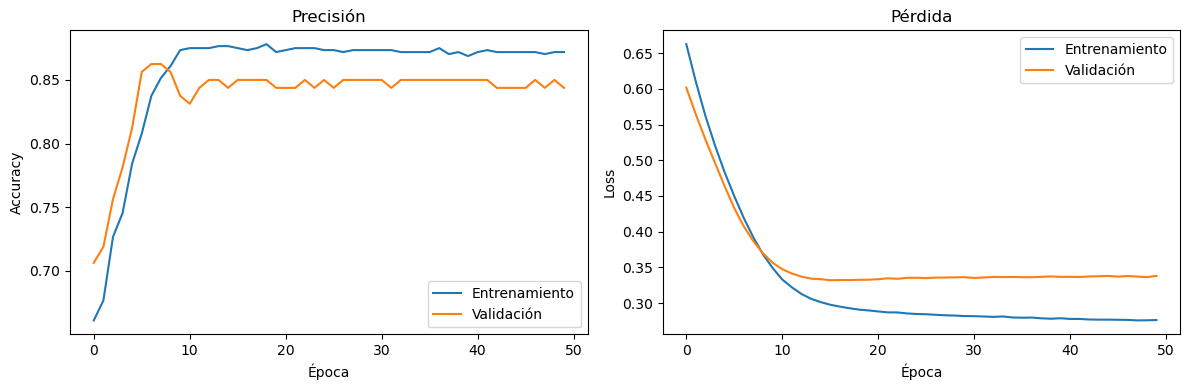

In [10]:
# 📉 Visualización del entrenamiento

plot_metrics(history)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


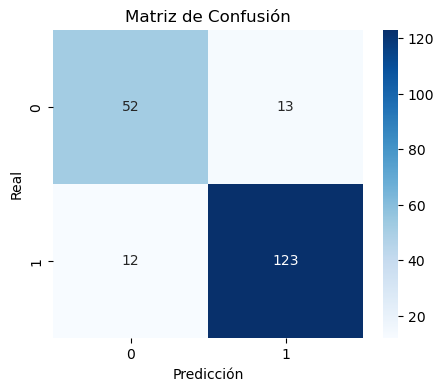

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        65
           1       0.90      0.91      0.91       135

    accuracy                           0.88       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.88      0.87       200



In [11]:
# 🧪 Evaluar modelo

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
show_confusion_matrix(y_test, y_pred_classes)
